### The concept of hyperparameter
Hyperparameter tuning is one of the most important parts of a machine learning pipeline. A wrong choice of the hyperparameters’ values may lead to wrong results and a model with poor performance.<br>

Hyperparameters are model parameters whose values are set **before** training.<br> These hyperparameters might address model design questions such as:

- What **degree of polynomial features** should I use for my linear model?
- What should be the **maximum depth** allowed for my decision tree?
- What should be the **minimum number of samples** required at a leaf node in my decision tree?
- **How many trees** should I include in my random forest?
- **How many neurons** should I have in my neural network layer?
- **How many layers** should I have in my neural network?
- What should I set my **learning rate** to for gradient descent?

Let's make it simple. For example, **the number of neurons** of a feed-forward neural network is a hyperparameter, because we set it before training. Another example of hyperparameter is **the number of trees** in a random forest or the penalty intensity of a Lasso regression. As you can see, the hyperparameters are all numbers that are set before the training phase and their values affect the behavior of the model.

### IMPORTANT!
Hyperparameters are **not** model parameters and they cannot be directly trained from the data. Model parameters are **learned** during training when we optimize a loss function using something like gradient descent.


### The reason for tuning the hyperparameters
Why should we tune the hyperparameters of a model?<br>

That is because we don’t really know the models' optimal values in advance. A model with different hyperparameters is, actually, a different model so it may have a different performance. In the case of neural networks, a less number of neurons could cause underfitting and a more number of them could cause overfitting. In both cases, the models are not good, so we need to find the optimal number of neurons that cause the best performance.<br>

If the model has several hyperparameters, we need to find the best combination of values of the hyperparameters searching in a multi-dimensional space. That’s why hyperparameter tuning, which is the process of finding the right values of the hyperparameters, is a very complex and time-expensive task.

### Hyperparameter tuning in practice
Tuning hyperparameters means making decisions on the **stopping criteria**. There are several stopping criteria, but we're going to deal with four first, such as:
1. The max_depth
2. The minimum size of the node: min_samples_split
3. The minimum lift: min_impurity_decrease
4. The cost-complexity<br>
---
The **max depth** means the maximum number of depth in the decision tree. The tree structure cannot be deeper than this value we set using **`max_depth`**. The smaller it is, the smaller the tree will be.<br>

The **minimum size of the node** is the number of data(samples) to split. The smaller the value, the larger the tree will be, and its default value is 2.<br>

We can set this using **`min_samples_split`** A node will be split if this split induces a decrease of the impurity greater than or equal to this value. The equation for min_sample_split is:<br>

$$\frac{N_t}{N} \times (impurity - \frac{N_{tR}}{N_t} \times right\;impurity - \frac{N_{tl}}{N_t} \times left\;impurity)$$

Where<br>
$N$ is the total number of samples<br>
$N_t$ is the total number of samples in current node<br>
$N_{tL}$ is the number of samples in the left child<br>
$N_{tR}$ is the number of samples in the right child<br>
$N$, $N_t$, $N_{tL}$, $N_{tR}$ are all refer to the weighted sum, if `sample_weight` is passed.<br>

The **minimum lift** is a criterion to see if the association rules between the items are coincidental or not. We can set the minimum lift using **`min_impurity_decrease`**.<br>

When the lift is the same or smaller than the value set, the tree will not split more. The smaller the value, the larger the tree will be.<br>

For pruning, we can think of two types of it. The first is **pre-pruning**, and the other is **post-pruning**. Pre-pruning is also called **early stopping**. It means literally stopping the training early. And we can do it by setting the max depth or the number of branches. Post-pruning is the process of performing pruning after we train the model. We can do post-pruning using the cost-complexity pruning technique.<br>

The **cost complexity** is a concept that is used in **cost complexity pruning**. Pruning is a technique to prevent overfitting by limiting the model by setting penalty coefficients for the impurity and for the decision tree being larger.<br>

In practice, we can do cost complexity pruning by finding the **$\alpha$** value with the least influence and prune the node with that value. The equation for cost complexity pruning is:

$$R_\alpha (T) = R(T) + \alpha |T|$$

where<br>
$R(T)$ is the learning errors of the leaf nodes<br>
$|T|$ is the number of leaf nodes<br>
$\alpha$ is the complexity parameter

When we focus on reducing the  𝑅(𝑇)  value only, the size of the tree gets bigger. It means the tree structure has more branches.  𝛼 decides the number of leaf nodes to be remained, thus we need to modify it to prevent overfitting. The bigger the  𝛼  value, the more nodes being pruned will be.<br>

Note that we need to calculate the $R_\alpha (T_t)$ for the sub-trees. The equation is very similar to above one.

$$R_\alpha (T_t) = R(T_t) + \alpha |T_t|$$

---
Using the stopping criteria such as above, we can set the optimal conditions for model training, and this process is called hyperparameter tuning.

### GridSearch

Amongst the hyperparameter tuning techniques, GridSearch, a sort of exhaustive search, shows the best performance. GridSearch is a technique that finds the best combination among the possible combinations. However, GridSearch also has cons because the training consumes a lot of time.<br>

For now, we will implement an exhaustive search using GridSearchCV module.

In [1]:
# Downloading data
!wget 'https://bit.ly/3gLj0Q6'

# Unzip the downloaded data
import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-09-14 21:23:45--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2022-09-14 21:23:45--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 142.250.207.110, 2404:6800:400a:813::200e
Connecting to drive.google.com (drive.google.com)|142.250.207.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a6i577p0b6tmd389h86ia1i9dgtok35a/1663158225000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download&uuid=08d2fcf4-cfc3-4ddb-b114-912af689774a [following]
--2022-09-14 21:23:46--  https://doc-0c-10-docs.googleuserc

In [2]:
# Import pandas and RandomForestRegressor
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Import numpy
import numpy as np

In [3]:
# Load data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# Check if the data loading is successful
print('============ Train Data ============\n')
print('Train Data Information\n', train.info(), '\n')
print('Train Data Shape: ', train.shape, '\n')

print('============ Test Data ============')
print('Test Data Information\n', test.info(), '\n')
print('Test Data Shape: ', test.shape, '\n')

============ Train Data ============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
Train Data Information
 None 

Train Data Shape:  (1459, 11) 

============ Test Data ============
<class 'pandas.

In [5]:
# Check the features of the data
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### Handling missing values

We have four options for now, such as:<br>

1: Delete the missing value<br>
2: Replace the missing value with a specific scala value<br>
3: Replace the missing value with the mean of the feature<br>
4: Replace the missing value using interpolation<br>

Since the Jupyter notebook does not allow us multiple interactions in a single cell, we will write our code in separate cells.<br>

- I noticed this after I wrote the bellow code. I was stupid.

In [6]:
# print('Missing value handling options\n')
# print('You have four options now to handle the missing value.')
# print('Input the number of process you want to, then hit the return key.\n')
# print('  1: Delete the missing value')
# print('  2: Replace the missing value with specific scala value')
# print('  3: Replace the missing value with the mean of the feature')
# print('  4: Replace the missing value using interpolation')

# user_input = input()

# if user_input == 1:
#     train.dropna(inplace=True)
#     print('You have deleted the missing values!')
# elif user_input == 2:
#     print('Input the value you want to replace the missing value')
#     inputted_value = input()
#     train.fillna(inputted_value, inplace=True)
#     test.fillna(inputted_value, inplace=True)
#     print(f'You have replace the missing values of train data and test data with {inputted_value}.')
# elif user_input == 3:
#     train.fillna(train.mean(), inplace=True)
#     test.fillna(test.mean(), inplace=True)
#     print(f'You have replace the missing values of train data {train.mean()} and test data with {test.mean()}.')
# elif user_input == 4:
#     train.interpolate(inplace=True)
#     test.interpolate(inplace=True)
#     print('You have replace the missing values of train data and test data using linear interpolation.')

In [7]:
# Check if there are missing values
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64 

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


In [ ]:
# Delete the missing values
train.dropna(inplace=True)
print('You have deleted the missing values!')

In [ ]:
# Replace the missing values with a specific value, or a string
inputted_value = input()
train.fillna(inputted_value, inplace=True)
test.fillna(inputted_value, inplace=True)
print(f'You have replace the missing values of train data and test data with {inputted_value}.')

In [ ]:
# Replace the missing values with the mean of each feature
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
print(f'You have replace the missing values of train data\n{train.mean()}\n\nand test data with\n{test.mean()}.')

In [8]:
# Replace the missing values using linear interpolation
train.interpolate(inplace=True)
test.interpolate(inplace=True)
print('You have replace the missing values of train data and test data using linear interpolation.')

You have replace the missing values of train data and test data using linear interpolation.


In [9]:
# Check if the null values are replaced well.
print(train.isnull().sum(), '\n')
print(test.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64 

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


In [10]:
# Import libraries for visualiztion
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Set the minus figure to be printed properly
plt.rc('axes', unicode_minus=False)

In [12]:
# Hide warnings that do not necessary for the analysis
import warnings
warnings.filterwarnings('ignore')

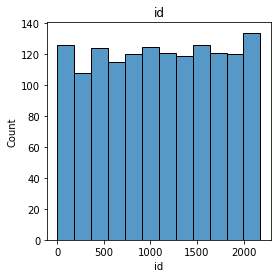

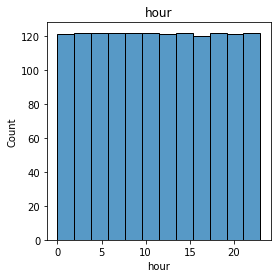

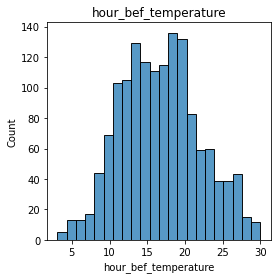

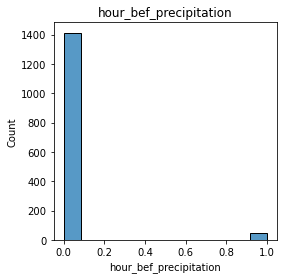

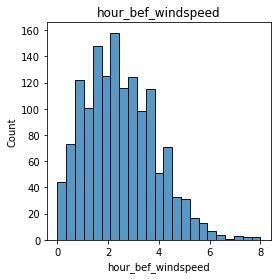

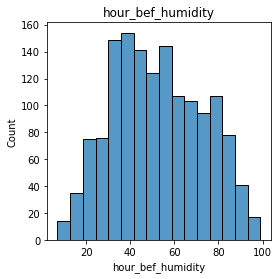

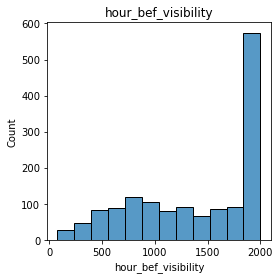

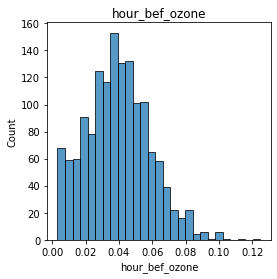

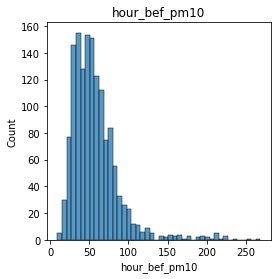

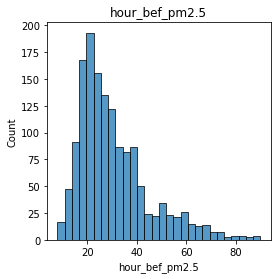

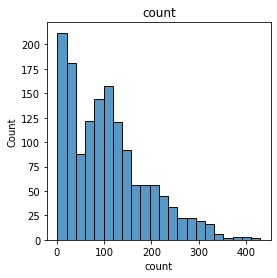

In [13]:
# Visualize features
for column in train.columns:
    plt.figure(figsize=(4, 4))
    plt.title(column)
    sns.histplot(train[column])
    plt.show()

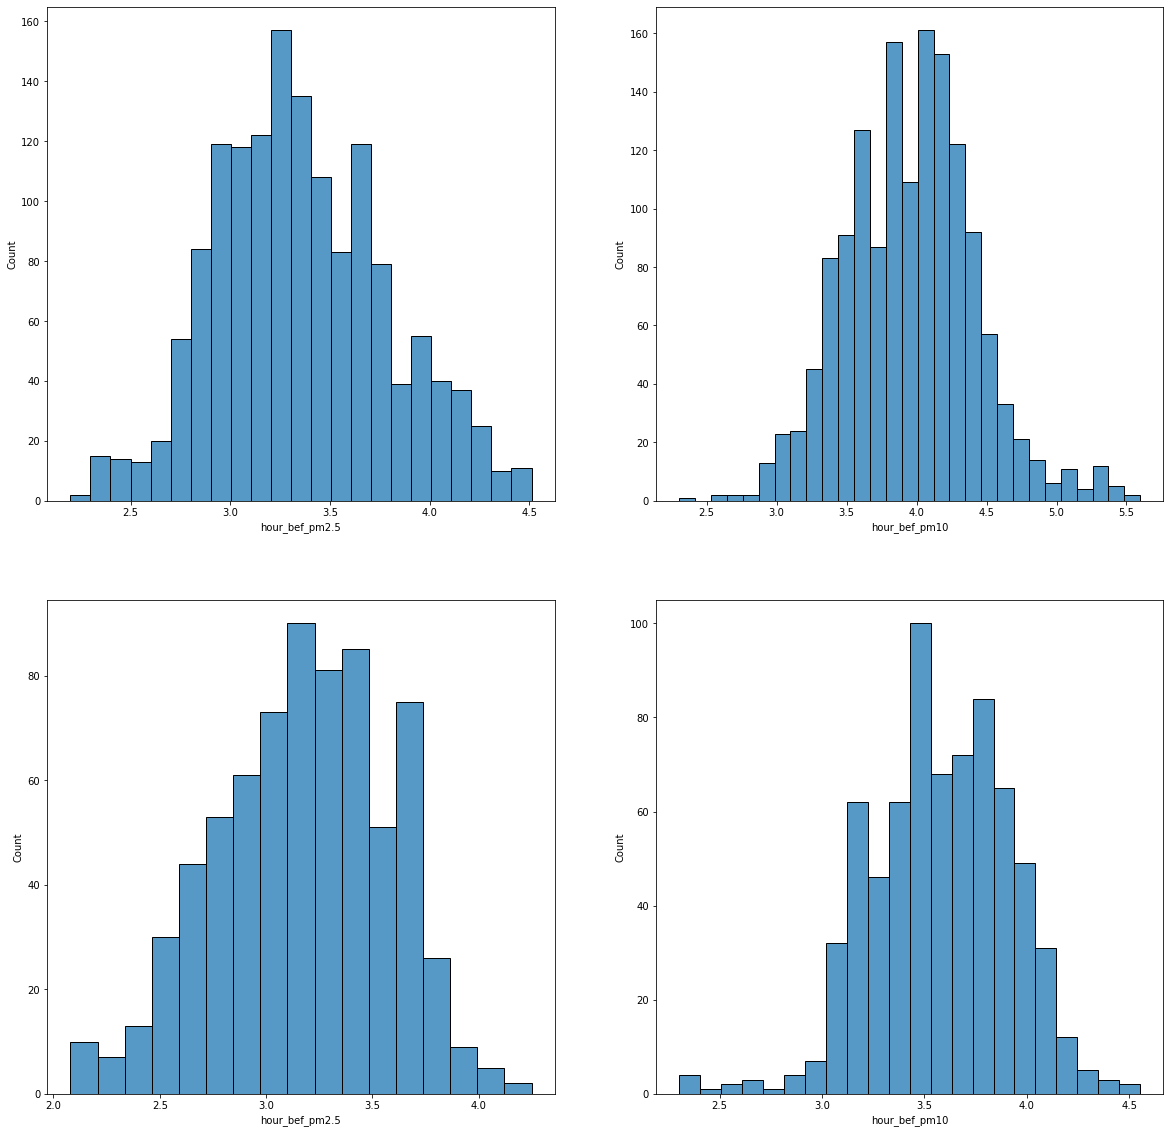

In [14]:
# When the data distribution is not even, we can use Min-Max Normalization
train['hour_bef_pm2.5'] = np.log1p(train['hour_bef_pm2.5'])
train['hour_bef_pm10'] = np.log1p(train['hour_bef_pm10'])

test['hour_bef_pm2.5'] = np.log1p(test['hour_bef_pm2.5'])
test['hour_bef_pm10'] = np.log1p(test['hour_bef_pm10'])

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))


sns.histplot(train['hour_bef_pm2.5'], ax=ax[0, 0])
sns.histplot(train['hour_bef_pm10'], ax=ax[0, 1])

sns.histplot(test['hour_bef_pm2.5'], ax=ax[1, 0])
sns.histplot(test['hour_bef_pm10'], ax=ax[1, 1])
plt.show()

In [15]:
# Compute pairwise correlation of columns, excluding NA/null values.
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000591,-0.056401,-0.003306,-0.017522,0.008626,0.053813,-0.022519,0.008771,-0.002131
hour,-0.010901,1.000000,0.407575,0.021708,0.461421,-0.330014,0.177172,0.356396,-0.040232,-0.083060,0.626047
hour_bef_temperature,-0.000591,0.407575,1.000000,-0.096827,0.375731,-0.496449,0.197925,0.516929,-0.003407,-0.044123,0.619594
hour_bef_precipitation,-0.056401,0.021708,-0.096827,1.000000,0.022536,0.276250,-0.216982,-0.058989,-0.044841,0.020741,-0.163580
hour_bef_windspeed,-0.003306,0.461421,0.375731,0.022536,1.000000,-0.432527,0.251438,0.498197,0.002864,-0.216222,0.458103
hour_bef_humidity,-0.017522,-0.330014,-0.496449,0.276250,-0.432527,1.000000,-0.592463,-0.397750,-0.063387,0.209889,-0.471329
hour_bef_visibility,0.008626,0.177172,0.197925,-0.216982,0.251438,-0.592463,1.000000,0.091149,-0.427773,-0.612240,0.299315
hour_bef_ozone,0.053813,0.356396,0.516929,-0.058989,0.498197,-0.397750,0.091149,1.000000,0.121120,0.018760,0.454864
hour_bef_pm10,-0.022519,-0.040232,-0.003407,-0.044841,0.002864,-0.063387,-0.427773,0.121120,1.000000,0.596698,-0.107252
hour_bef_pm2.5,0.008771,-0.083060,-0.044123,0.020741,-0.216222,0.209889,-0.612240,0.018760,0.596698,1.000000,-0.140882


<AxesSubplot:>

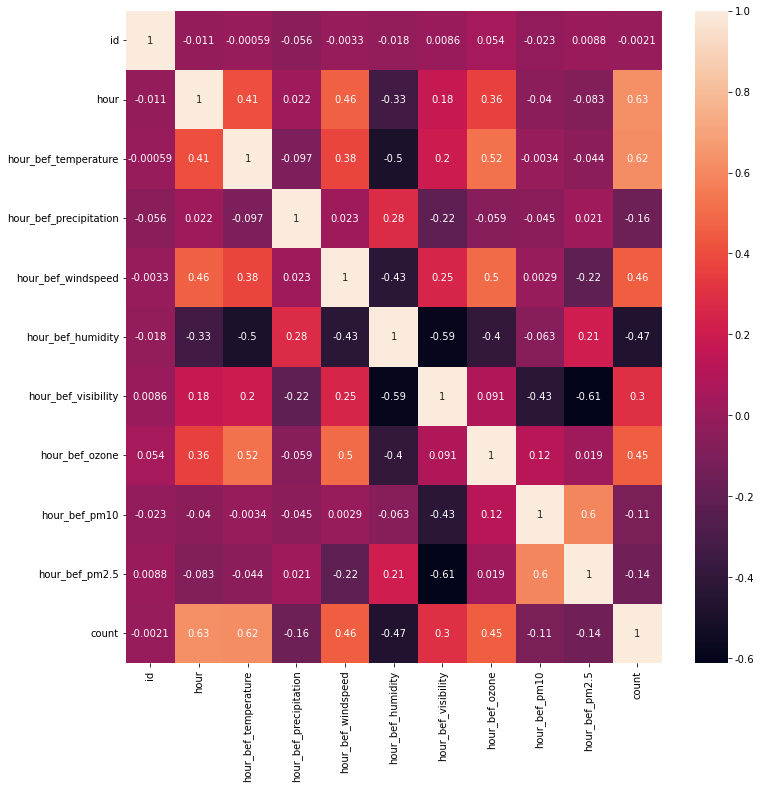

In [16]:
# Visualize the correlation
plt.figure(figsize = (12, 12))

# annot: optional. If True, write the data value in each cell.
# If an array-like with the same shape as data, then we can use this option to annotate the heatmap.
# The annotation will replace the heatmap's data.
# Note that DataFrames will match on position, not index.
sns.heatmap(train.corr(), annot = True)

<AxesSubplot:xlabel='hour', ylabel='count'>

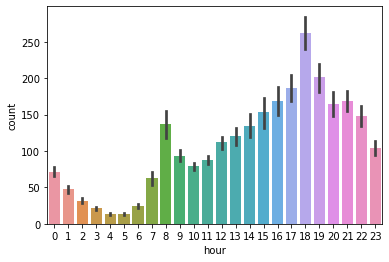

In [17]:
# We also can visualize the data using bar plot
sns.barplot(x = 'hour', y = 'count', data = train)

### Modeling

In [18]:
# Declare the model
X_train = train.drop(['count'], axis=1)
Y_train = train['count']

# Train the model
model = RandomForestRegressor(criterion = 'squared_error')
model.fit(X_train, Y_train)

RandomForestRegressor()

In [19]:
# Print the feature importances
model.feature_importances_

array([0.02476378, 0.59415039, 0.18229563, 0.01792784, 0.02585046,
       0.03706189, 0.03000948, 0.03491659, 0.0321738 , 0.02085015])

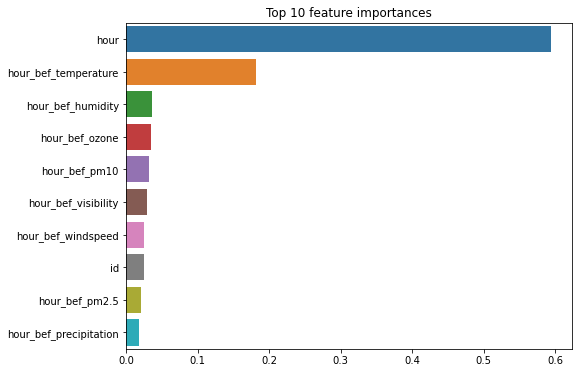

In [20]:
# Visualizing the feature importances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importance_values = model.feature_importances_
importances = pd.Series(importance_values, index = X_train.columns)
importance_top10 = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Top 10 feature importances')
sns.barplot(x = importance_top10, y = importance_top10.index)
plt.show()

In [21]:
# Create train datasets by removing the less important features
X_train1 = train.drop(['count', 'hour_bef_precipitation'], axis=1)
X_train2 = train.drop(['count', 'hour_bef_precipitation', 'hour_bef_pm2.5'], axis=1)
X_train3 = train.drop(['count', 'hour_bef_precipitation', 'hour_bef_pm2.5', 'id'], axis=1)
X_train4 = train.drop(['count', 'hour_bef_precipitation', 'hour_bef_pm2.5', 'id', 'hour_bef_windspeed'], axis=1)

Y_train = train['count']

# Create test datasets
test1 = test.drop(['hour_bef_precipitation'], axis=1)
test2 = test.drop(['hour_bef_precipitation', 'hour_bef_pm2.5'], axis=1)
test3 = test.drop(['hour_bef_precipitation', 'hour_bef_pm2.5', 'id'], axis=1)
test4 = test.drop(['hour_bef_precipitation', 'hour_bef_pm2.5', 'id', 'hour_bef_windspeed'], axis=1)

In [22]:
# Check the shape of training and test data
print('X_train1.shape: ', X_train1.shape, '\n')
print('X_train2.shape: ', X_train2.shape, '\n')
print('X_train3.shape: ', X_train3.shape, '\n')
print('X_train4.shape: ', X_train4.shape, '\n')
print('Y_train.shape: ', Y_train.shape, '\n')
print('test1.shape', test1.shape, '\n')
print('test2.shape', test2.shape, '\n')
print('test3.shape', test3.shape, '\n')
print('test4.shape', test4.shape, '\n')

X_train1.shape:  (1459, 9) 

X_train2.shape:  (1459, 8) 

X_train3.shape:  (1459, 7) 

X_train4.shape:  (1459, 6) 

Y_train.shape:  (1459,) 

test1.shape (715, 9) 

test2.shape (715, 8) 

test3.shape (715, 7) 

test4.shape (715, 6) 



In [23]:
# Declare separate models
model1 = RandomForestRegressor(criterion = 'squared_error')
model2 = RandomForestRegressor(criterion = 'squared_error')
model3 = RandomForestRegressor(criterion = 'squared_error')
model4 = RandomForestRegressor(criterion = 'squared_error')

# Train the saparated models
model1.fit(X_train1, Y_train)
model2.fit(X_train2, Y_train)
model3.fit(X_train3, Y_train)
model4.fit(X_train4, Y_train)

RandomForestRegressor()

### RandomForest Hyperparameters

**n_estimators:** Number of decision making tree
- Default = 10
- When increase it, the performance may get better, but may cause too much train time.<br>

**min_samples_split**: The minimum number of sample used to split node
- Used to control overfitting
- Default = 2: The smaller the value, the greater possibility of overfitting because of the increasing node split<br>

**min_samples_leaf**: The minimum number of samples to be leaf node
- Along to min_samples_split, it is used to control the overfitting
- When the data is imbalanced, some data of a specific class may extremely small, thus it needs to be kept the small value<br>

**max_features**: Maximum number of features for optimal split
- Default = 'auto'
    - Note: The default value of max_feature is none in decision tree
- When specified in int type: The number of features
- When specified in float type: The ratio of features
- 'sqrt' or 'auto': Samples as many as $\sqrt{The\;number\;of\;whole\;features}$
- log : Samples as many as $\log_2{(The\;number\;of\;whole\;features)}$<br>

**max_depth**: Maximum depth of the tree
- Default = none
    - Split until the class value is completely determined
    - Or until the number of data is less than min_samples_split
- As the depth increases, it may overfit, so proper control is required.<br>

**max_leaf_nodes**: The maximum number of leaf nodes

### GridSearchCV initializer
- estimator: classifier, regressor, pipeline, and so on.

- param_grid: In the dictionary type, input the parameters that are going to be used for parameter tuning.

- scoring: Method to evaluate the prediction performance. Usually set to accuracy.

- cv: Specifies the number of divisions in cross-validation(The number of fold).

- refit: The default value is True. When it is set default, it finds the optimal hyperparameter and retrains it.

- n_jobs: The default value is 1, Set -1 to use all cores.

In [24]:
from sklearn.model_selection import GridSearchCV
import time

model = RandomForestRegressor(criterion = 'mse',
                              random_state=2022)

params = {'min_samples_split': [30, 50, 70],
          'max_depth': [5, 6, 7],
          'n_estimators': [50, 150, 250]}

# Declare GridSearchCV for each model 
greedy_CV1 = GridSearchCV(estimator = model1,
                          param_grid = params,
                          cv = 3,
                          scoring = 'neg_mean_squared_error')

greedy_CV2 = GridSearchCV(estimator = model2,
                          param_grid = params,
                          cv = 3,
                          scoring = 'neg_mean_squared_error')

greedy_CV3 = GridSearchCV(estimator = model3,
                          param_grid = params,
                          cv = 3,
                          scoring = 'neg_mean_squared_error')

greedy_CV4 = GridSearchCV(estimator = model4,
                          param_grid = params,
                          cv = 3,
                          scoring = 'neg_mean_squared_error')

start_time = time.time()

# Train for each dataset
greedy_CV1.fit(X_train1, Y_train)
greedy_CV2.fit(X_train2, Y_train)
greedy_CV3.fit(X_train3, Y_train)
greedy_CV4.fit(X_train4, Y_train)

end_time = time.time()

print("Processing time: ", end_time-start_time, 'seconds.')

Processing time:  73.06106042861938 seconds.


In [25]:
# Predict with each trained model
prediction1 = greedy_CV1.predict(test1)
prediction2 = greedy_CV2.predict(test2)
prediction3 = greedy_CV3.predict(test3)
prediction4 = greedy_CV4.predict(test4)

print(prediction1)
print(prediction2)
print(prediction3)
print(prediction4)

[ 87.3400386  248.32849938  99.14119759  30.9780525   52.72879999
 123.82824284 143.59283245 303.58481745  29.93132716 115.42726986
 296.79858905 247.37725783 118.98572584  39.17088926 235.72818274
 158.39867476  25.4094869  205.04821054 311.82845174 168.0570745
 219.07712897  72.71033451  19.37987025 138.17745381 148.40410116
 111.27704845  25.07779777 117.20872679 108.31807495 148.26734479
  86.5246975   25.95409004  60.76166388 133.58527488 260.38775201
  29.33538096 134.14978951 157.32020049 218.64456376  69.06850254
  60.39257548 118.72035907 164.48225611  82.57880206 298.70551753
 191.72736752  70.50583785  60.79999377  18.69970106  87.01738301
 248.17337167  87.64087616 160.48098443 105.26019079 187.59098945
 161.51022615  39.92767474 174.87177927  19.36631118  18.30890417
  90.53525207  89.01511723 261.68387172 288.84386195 160.69046009
 296.10121843  18.96701136 217.57074047 142.49735033  25.8933967
 103.75813225  37.95778327 161.15624585  18.3040238  302.57139797
 208.7593419

In [26]:
# Save the prediction results
GridSearchCV1 = pd.read_csv('data/submission.csv')
GridSearchCV2 = pd.read_csv('data/submission.csv')
GridSearchCV3 = pd.read_csv('data/submission.csv')
GridSearchCV4 = pd.read_csv('data/submission.csv')

GridSearchCV1['count'] = np.round(prediction1, 2)
GridSearchCV2['count'] = np.round(prediction2, 2)
GridSearchCV3['count'] = np.round(prediction3, 2)
GridSearchCV4['count'] = np.round(prediction4, 2)

print(GridSearchCV1.head(), '\n\n',
      GridSearchCV2.head(), '\n\n',
      GridSearchCV3.head(), '\n\n',
      GridSearchCV4.head())

   id   count
0   0   87.34
1   1  248.33
2   2   99.14
3   4   30.98
4   5   52.73 

    id   count
0   0   90.11
1   1  244.70
2   2  105.46
3   4   31.58
4   5   50.55 

    id   count
0   0   90.72
1   1  240.62
2   2   96.18
3   4   32.57
4   5   47.58 

    id   count
0   0   88.74
1   1  241.33
2   2   98.44
3   4   33.53
4   5   65.00


In [27]:
# Save the results
GridSearchCV1.to_csv('GridSearchCV1_result.csv')
GridSearchCV2.to_csv('GridSearchCV2_result.csv')
GridSearchCV3.to_csv('GridSearchCV3_result.csv')
GridSearchCV4.to_csv('GridSearchCV4_result.csv')